In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data=pd.read_csv('linear_regression_dataset.csv')
print (data)

     AGE  FEMALE  LOS  RACE  TOTCHG  APRDRG
0     17       1    2   1.0    2660     560
1     17       0    2   1.0    1689     753
2     17       1    7   1.0   20060     930
3     17       1    1   1.0     736     758
4     17       1    1   1.0    1194     754
..   ...     ...  ...   ...     ...     ...
495    0       1    6   1.0    5881     636
496    0       1    2   1.0    1171     640
497    0       1    2   1.0    1171     640
498    0       1    2   1.0    1086     640
499    0       0    4   1.0    4931     640

[500 rows x 6 columns]


In [9]:
medianrace=data.RACE.median()
data.RACE=data.RACE.fillna(medianrace)

#normalizing
data['AGE']=(data['AGE']-data['AGE'].mean())/data['AGE'].std()
data['LOS']=(data['LOS']-data['LOS'].mean())/data['LOS'].std()
data['TOTCHG']=(data['TOTCHG']-data['TOTCHG'].mean())/data['TOTCHG'].std()
data['APRDRG']=(data['APRDRG']-data['APRDRG'].mean())/data['APRDRG'].std()
data['RACE']=(data['RACE']-data['RACE'].mean())/data['RACE'].std()

In [10]:
X = data.iloc[:,0:5].to_numpy()
#adding ones
one = np.ones([X.shape[0],1])
X = np.concatenate((one,X),axis=1)

#taking y and coeffients array
y = data.iloc[:,5:6].to_numpy()
m = len(y)
coef = np.zeros([1,6])
#shuffle dataset
X = np.concatenate((X,y),axis=1)
np.random.shuffle(X)  
y =(X[ :, 6:7])
X = np.delete(X, 6, axis=1)
#split dataset
trainx, testx=np.vsplit(X, 2)
trainy, testy=np.vsplit(y, 2)
m=m/2

#learning rate and iterations
alpha=0.1
it=1000


In [11]:
#cost function
def costfunction(X,y, coef):
    tobesummed = (((X @ coef.T)-y) ** 2)/(2 * m)
    return np.sum(tobesummed)

#gradient descent function
def descentfunction(X,y,coef, alpha, it):
    cost=np.zeros(it)
    
    for i in range (it):
        coef=coef - (alpha/m) * np.sum((X @coef.T - y) * X, axis=0)
        cost[i]=costfunction(X,y, coef)
    return coef, cost


line, cost = descentfunction(trainx,trainy, coef, alpha, it)

finalcost = costfunction(testx,testy, line)
print (finalcost)

0.34954258930306553


Text(0, 0.5, 'Cost')

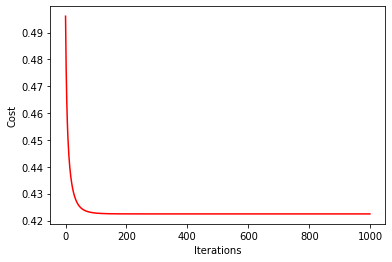

In [12]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(it), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  